In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
birthrates_df = pd.read_csv('data/birth-rates-yearly.csv')
birthrates_df.head()

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994


In [37]:
birthrates_df=birthrates_df.groupby(['year']).mean()
birthrates_df['year1'] = birthrates_df.index

In [38]:
birthrates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1960 to 2008
Data columns (total 2 columns):
rate     49 non-null float64
year1    49 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


## Scatter Plot

Text(9.924999999999997, 0.5, 'Avg Birth Rate')

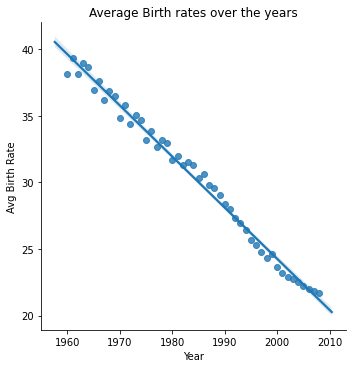

In [46]:
sns.lmplot(x='year1',y='rate',data=birthrates_df)
plt.title('Average Birth rates over the years')
plt.xlabel('Year')
plt.ylabel('Avg Birth Rate')

In [47]:
crime_df = pd.read_csv('data/crimerates-by-state-2005.csv')
crime_df = crime_df[crime_df['state']!='United States']
crime_df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


## Dense Plot

Text(0.5, 0, 'Population')

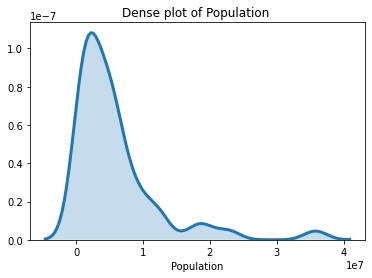

In [51]:
# Dense plot of population
sns.distplot(crime_df['population'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Dense plot of Population ')
plt.xlabel('Population')

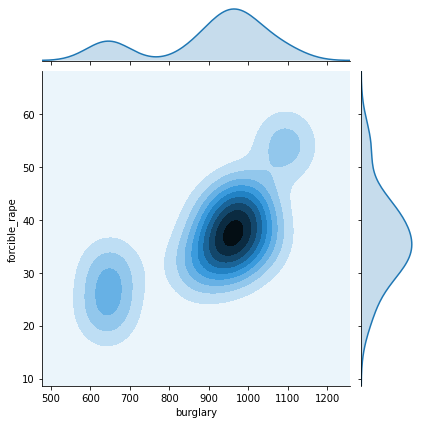

In [81]:
sns.jointplot('burglary','forcible_rape', data=crime_df, kind='kde', space=0.2)
plt.title("Density estimates - Burglary vs Forcible rape")

## Bubble Chart

In [73]:
## Top 10 states by murders
crime_df = crime_df.nlargest(10, 'murder')

In [77]:

import chart_studio.plotly as py

py.plotly.tools.set_credentials_file(username='sathishinfa', api_key='eSKRX6tNi2ae0WWmTvs2')
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

crime_df.iplot(kind='bubble', x='murder', y='robbery', size='population', text='state',
             xTitle='Murders', yTitle='Robberries',
             filename='Murder and Robbery by population')